<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/Chapter5WaveImaging/phaseTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase transfer between two pictures
## David Brady
## University of Arizona
## January 2021

This is a silly notebook exchanging phase between two pictures


## initialization

In [15]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import skimage
from skimage.transform import resize
import  cv2
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]


In [6]:
!wget https://www.americanhungarianfederation.org/FamousHungarians/images/gabor_dennis_holography.jpg
!wget --no-check-certificate https://optica-org-web-afd-f9abf4byhbacgfgk.z02.azurefd.net/optica/media/osa.history/imagegallery/f-j/ja/james_r_fienup_2013_leith.jpg

--2024-10-10 16:23:03--  https://www.americanhungarianfederation.org/FamousHungarians/images/gabor_dennis_holography.jpg
Resolving www.americanhungarianfederation.org (www.americanhungarianfederation.org)... 74.208.236.213
Connecting to www.americanhungarianfederation.org (www.americanhungarianfederation.org)|74.208.236.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78827 (77K) [image/jpeg]
Saving to: ‘gabor_dennis_holography.jpg.1’

gabor_dennis_hologr 100%[===================>]  76.98K   192KB/s    in 0.4s    

2024-10-10 16:23:05 (192 KB/s) - ‘gabor_dennis_holography.jpg.1’ saved [78827/78827]

--2024-10-10 16:23:05--  https://optica-org-web-afd-f9abf4byhbacgfgk.z02.azurefd.net/optica/media/osa.history/imagegallery/f-j/ja/james_r_fienup_2013_leith.jpg
Resolving optica-org-web-afd-f9abf4byhbacgfgk.z02.azurefd.net (optica-org-web-afd-f9abf4byhbacgfgk.z02.azurefd.net)... 13.107.246.73, 2620:1ec:bdf::73
Connecting to optica-org-web-afd-f9abf4byhbacgfgk.z02

## get the images

In [20]:
gabor=cv2.imread("gabor_dennis_holography.jpg", cv2.IMREAD_GRAYSCALE)
fienup=cv2.imread("james_r_fienup_2013_leith.jpg", cv2.IMREAD_GRAYSCALE)
gabor=gabor[:,(570-340):]
gabor=resize(gabor,(256,256))
fienup=resize(fienup[50:781,:],(256,256))

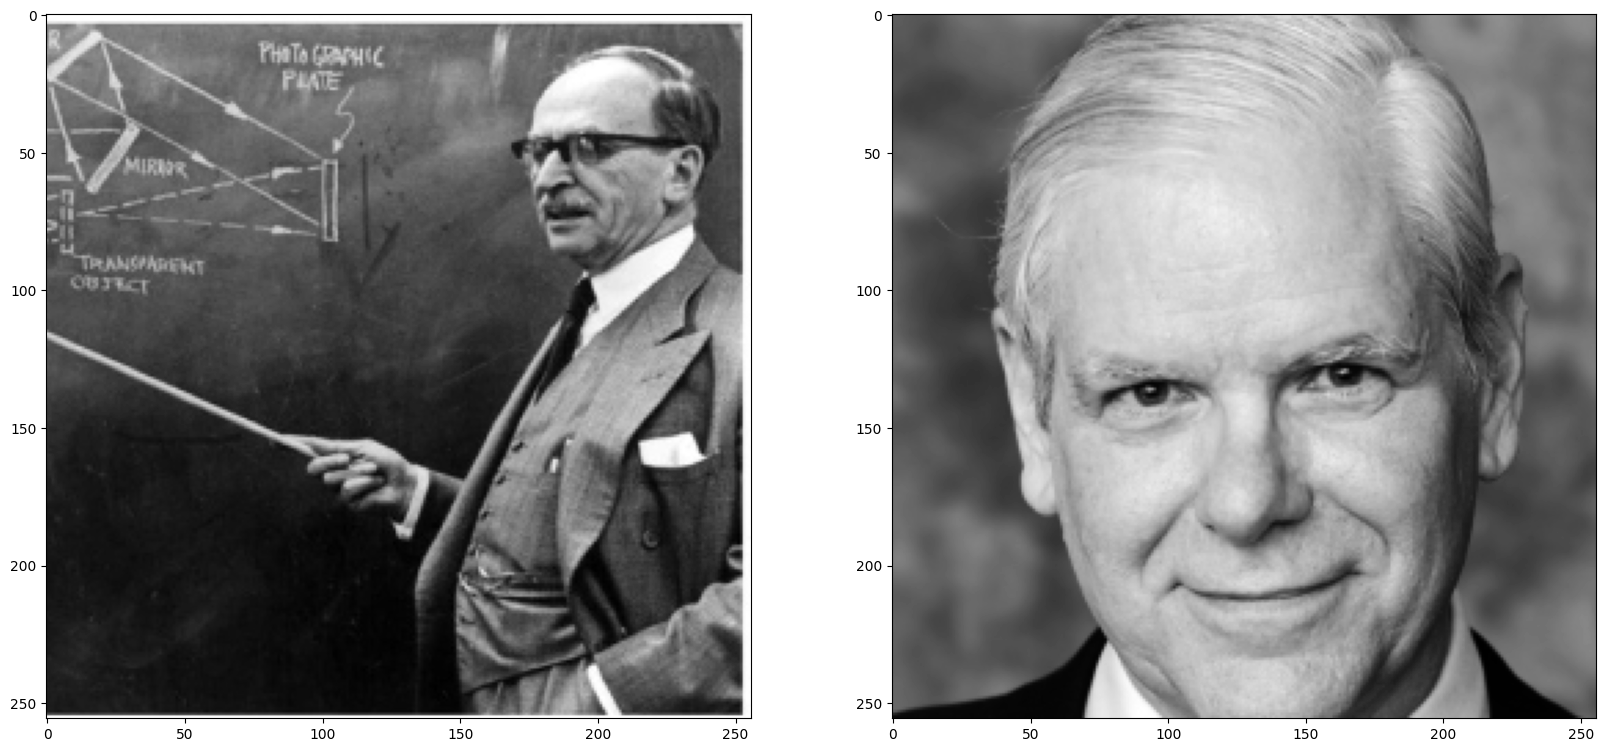

In [21]:
plt.subplot(1,2,1)
plt.imshow(gabor, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(fienup, cmap='gray')

## fourier transform of the images

In [22]:
gaborft=np.fft.fftshift(np.fft.fft2(gabor-np.mean(gabor)))
fienupft=np.fft.fftshift(np.fft.fft2(fienup-np.mean(fienup)))

Text(0.5, 1.0, 'phase fienup')

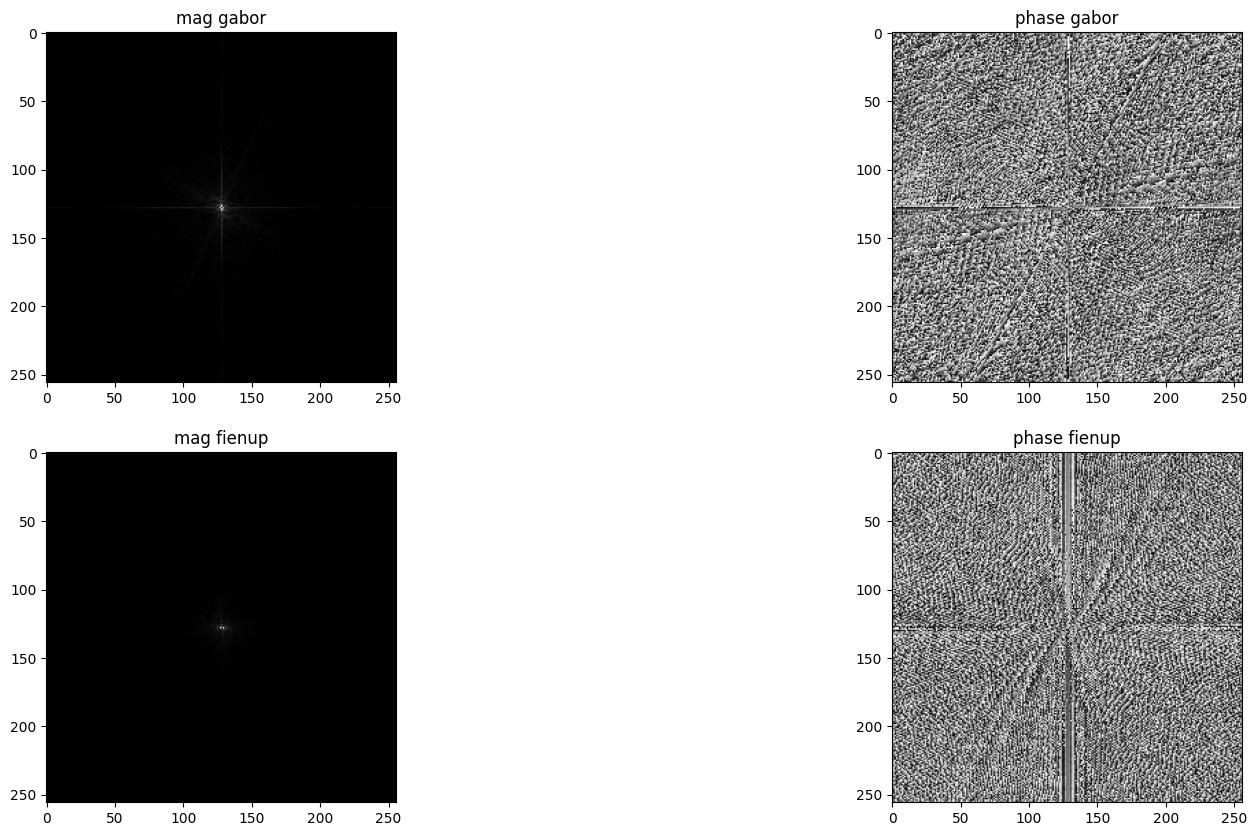

In [23]:
plt.subplot(2,2,1)
plt.imshow(np.abs(gaborft), cmap='gray')
plt.title('mag gabor')
plt.subplot(2,2,2)
plt.imshow(np.angle(gaborft), cmap='gray')
plt.title('phase gabor')
plt.subplot(2,2,3)
plt.imshow(np.abs(fienupft), cmap='gray')
plt.title('mag fienup')
plt.subplot(2,2,4)
plt.imshow(np.angle(fienupft), cmap='gray')
plt.title('phase fienup')

## reconstruction with the phase swapped

Text(0.5, 1.0, 'mag fienup phase gabor')

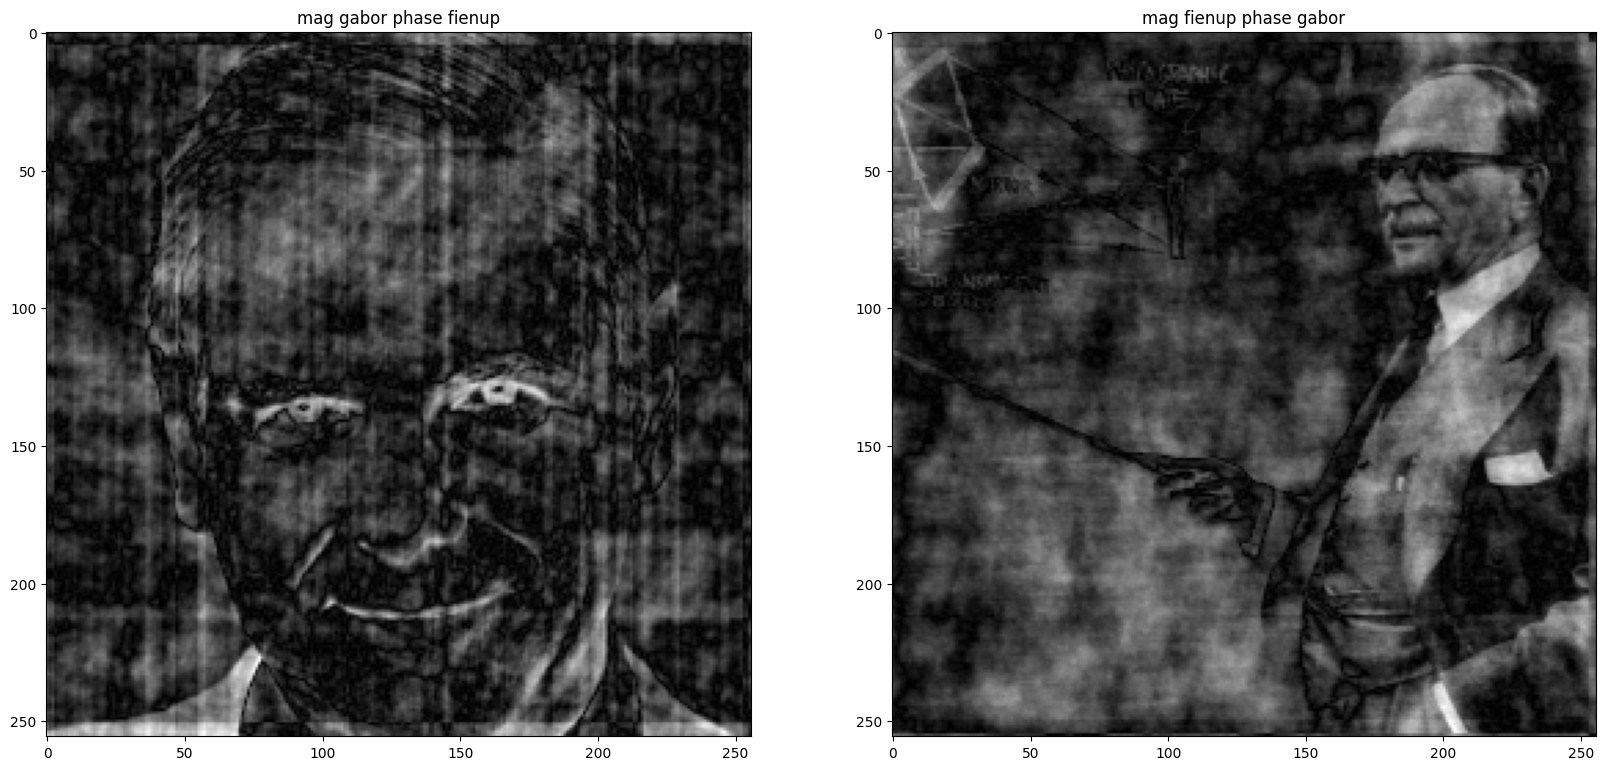

In [24]:
gaborfien=np.abs(gaborft)*np.exp(1j*np.angle(fienupft))
gaborfien=np.fft.ifft2(gaborfien)
fiengabor=np.abs(fienupft)*np.exp(1j*np.angle(gaborft))
fiengabor=np.fft.ifft2(fiengabor)
plt.subplot(1,2,1)
plt.imshow(np.abs(gaborfien), cmap='gray')
plt.title('mag gabor phase fienup')
plt.subplot(1,2,2)
plt.imshow(np.abs(fiengabor), cmap='gray')
plt.title('mag fienup phase gabor')